constants imports etc

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from scipy.linalg import lstsq as scilstst


DIFFUSIVITY = 0.6 # Diffusivity, may want to check the vaidity of this paticular number
r_0 = 1.2 # In fm, may want to chose a better value for small nuclei
NUM_CORE_NUCLEONS = 10 # The number of nucleons in the core
TOT_ANG_MOMENTUM = 0.5 # Total angular momentum
ORB_ANG_MOMENTUM = 0 # Orbital angular momentum

INITAL_C_GUESS = 0.01
V_LS = 21.0

r, a, j, l, R0, V0, Vls = sympy.symbols('r a j l R0 V0 Vls')

In [102]:
def five_gaussian_potential(r, c_1, beta_1, c_2, beta_2, c_3, beta_3, c_4, beta_4, c_5, beta_5, orb_ang_moment=ORB_ANG_MOMENTUM):
    """
    Defines our gaussian potential as a sum of 5 different potentials of the form V_0 e^(beta*r^2), for a set
    of beta.
    Input
    r : 1D array
    """
    V_0 = -11.39 * (-1)**orb_ang_moment - 51.13 # Defines V_0 for odd and even l states
    return - (V_0) * (c_1 * np.exp(-beta_1 * r**2) + c_2 * np.exp(-beta_2 * r**2) + c_3 * np.exp(
        -beta_3 * r**2) + c_4 * np.exp(-beta_4 * r**2) + c_5 * np.exp(-beta_5 * r**2))


def twelve_gaussian_potential(r, c_1, beta_1, c_2, beta_2, c_3, beta_3, c_4, beta_4, c_5, beta_5, c_6, beta_6,
                              c_7, beta_7, c_8, beta_8, c_9, beta_9, c_10, beta_10, c_11, beta_11, c_12,
                              beta_12,orb_ang_moment=ORB_ANG_MOMENTUM):
    """
    Defines our gaussian potential as a sum of 5 different potentials of the form V_0 e^(beta*r^2), for a set
    of beta.
    Input
    r : 1D array
    """
    V_0 = -11.39 * (-1)**orb_ang_moment - 51.13 # Defines V_0 for odd and even l states
    return - (V_0) * (c_1 * np.exp(-beta_1 * r**2) + c_2 * np.exp(-beta_2 * r**2) + c_3 * np.exp(
        -beta_3 * r**2) + c_4 * np.exp(-beta_4 * r**2) + c_5 * np.exp(-beta_5 * r**2)  +c_6 * np.exp(
        -beta_6 * r**2) + c_7 * np.exp(-beta_7 * r**2) + c_8 * np.exp(-beta_8 * r**2) + c_9 * np.exp(
        -beta_9 * r**2) + c_10 * np.exp(-beta_10 * r**2) + c_11 * np.exp(
        -beta_11 * r**2) + c_12 * np.exp(-beta_12 * r**2))

In [103]:
def gaussian_function(r, c, β):
    return c * np.exp(- β * (r)**2)

def woods_saxon_function(r, r_0=r_0, A_c=NUM_CORE_NUCLEONS, a=DIFFUSIVITY):
    R_0 = r_0 * A_c**(1/3)
    return 1 / (1 + np.exp((r - R_0) / a))

def woods_saxon_function_derivative(r, r_0=r_0, A_c=NUM_CORE_NUCLEONS, a=DIFFUSIVITY):
    R_0 = r_0 * A_c**(1/3)
    numerator = np.exp((r - R_0) / a)
    denominator = a * (np.exp((r - R_0) / a) + 1)**2
    return -1 * numerator * denominator

def spin_orbit_coefficent(j=TOT_ANG_MOMENTUM, l=ORB_ANG_MOMENTUM):
    return (j * (j + 1) - l * (l + 1) - 3 / 4 ) / 2

def geometric_progression(potential_parameter, i, geometric_progression_number=2):
    return potential_parameter * geometric_progression_number**(i)

def full_ws_potential(r, V_ls=V_LS, orb_ang_moment=ORB_ANG_MOMENTUM):
    potential_depth = -11.39 * (-1)**orb_ang_moment - 51.13
    return potential_depth * woods_saxon_function(r) + V_ls * spin_orbit_coefficent() * (1 / r) * woods_saxon_function_derivative(r)


In [104]:
#build geometric beta sequence
NUMBER_OF_GAUSSIANS = 12
ratio = 2
beta_1 = 0.05
betas = beta_1 * ratio ** np.arange(NUMBER_OF_GAUSSIANS)
print(betas)
r_values = np.linspace(0.00000001, 12, 1200)

[5.000e-02 1.000e-01 2.000e-01 4.000e-01 8.000e-01 1.600e+00 3.200e+00
 6.400e+00 1.280e+01 2.560e+01 5.120e+01 1.024e+02]


In [105]:
#design matrix A
V0 = np.abs(-11.39 * (-1)**ORB_ANG_MOMENTUM - 51.13)

A = V0 * np.exp(-(r_values[:, None]**2) * betas[None, :])
print(A)

#vector b
R0 = r_0 * (NUM_CORE_NUCLEONS ** (1/3))
b = finding_full_woods_saxon_potential(r_values)


[[6.25200000e+01 6.25200000e+01 6.25200000e+01 ... 6.25200000e+01
  6.25200000e+01 6.25200000e+01]
 [6.25196869e+01 6.25193738e+01 6.25187475e+01 ... 6.23598868e+01
  6.22001836e+01 6.18820032e+01]
 [6.25187475e+01 6.25174951e+01 6.25149902e+01 ... 6.18820038e+01
  6.12505182e+01 6.00068134e+01]
 ...
 [4.78103321e-02 3.65615459e-05 2.13811043e-11 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.72402737e-02 3.56948729e-05 2.03794618e-11 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.66765447e-02 3.48480459e-05 1.94239652e-11 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [106]:
c, residuals, rank, s = scilstst(A, b)
print(c)

[ 6.26832917e-04 -1.09625290e-02 -1.56469572e-01 -6.34247528e-01
 -8.91025237e-02  1.16043487e-01 -8.39925181e-02  1.80297249e-02
 -1.35783873e-02 -2.49379911e-02  2.51059339e-02 -2.48142345e-02]


C:\Users\faola\AppData\Local\Temp\ipykernel_11428\1544489643.py:9: RuntimeWarning: divide by zero encountered in divide
  spin_orbit_term = Vls * l_dot_s * (1 / r) * woods_saxon_derivative
C:\Users\faola\AppData\Local\Temp\ipykernel_11428\1544489643.py:9: RuntimeWarning: invalid value encountered in multiply
  spin_orbit_term = Vls * l_dot_s * (1 / r) * woods_saxon_derivative


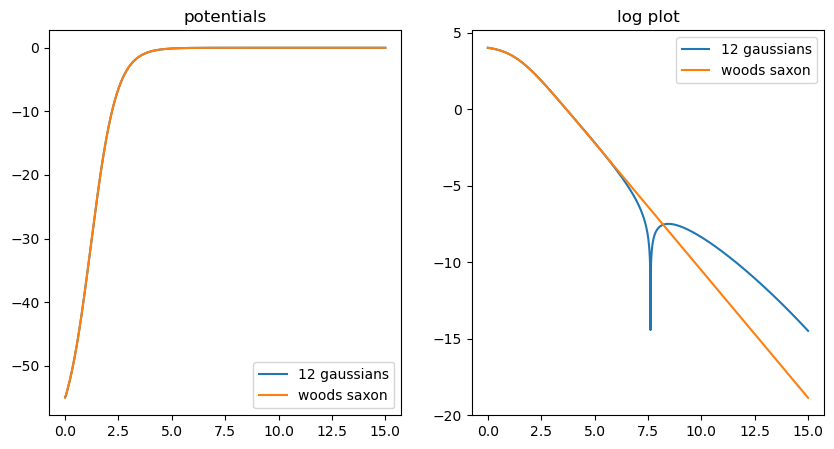

In [107]:
fig = plt.figure(figsize = (10,5))
V0 = np.abs(-11.39 * (-1)**ORB_ANG_MOMENTUM - 51.13)
X_vals = np.linspace(0, 15, 10000)

spec = fig.add_gridspec(ncols=2, nrows=1)
ax_1 = fig.add_subplot(spec[0, 0])
ax_2 = fig.add_subplot(spec[0, 1])

gaussian_potentials_five = five_gaussian_potential(X_vals, c[0], betas[0], c[1], betas[1], c[2], betas[2], c[3], betas[3], c[4], betas[4])
gaussian_potentials_twelve = twelve_gaussian_potential(X_vals, c[0], betas[0], c[1], betas[1], c[2], betas[2], c[3], betas[3], c[4], betas[4], c[5], betas[5],
                                               c[6], betas[6], c[7], betas[7], c[8], betas[8], c[9], betas[9], c[10], betas[10], c[11], betas[11])

#ax_1.plot(X_vals, gaussian_potentials_five, label = '5 gaussians')
ax_1.plot(X_vals, gaussian_potentials_twelve, label = '12 gaussians')
ax_1.plot(X_vals, finding_full_woods_saxon_potential(X_vals), label = 'woods saxon')
ax_1.legend()
ax_1.set_title('potentials')

#gaussian_potentials = (1 / 63) *five_gaussian_potential(r_values, c[0], betas[0], c[1], betas[1], c[2], betas[2], c[3], betas[3], c[4], betas[4])

#ax_2.plot(X_vals, np.log(np.abs(gaussian_potentials_five)), label = '5 gaussians')
ax_2.plot(X_vals, np.log(np.abs(gaussian_potentials_twelve)), label = '12 gaussians')
ax_2.plot(X_vals, np.log(np.abs(finding_full_woods_saxon_potential(X_vals))), label = 'woods saxon')
ax_2.set_title('log plot')

# division = gaussian_potentials / finding_full_woods_saxon_potential(r_values)
# print(division[0:50])

plt.legend()
plt.show()